In [1]:
import numpy as  np 
from sklearn.datasets import make_blobs 
from sklearn.cluster import KMeans

In [2]:
X, labels = make_blobs(100, centers=1)
kmeans = KMeans(n_clusters=1)
kmeans.fit(X)
kmeans.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 1,
 'n_init': 10,
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

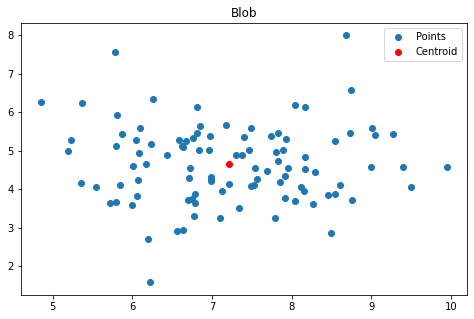

In [3]:
import matplotlib.pyplot as plt 
%matplotlib inline 

fig, ax = plt.subplots(figsize=(8,5))
ax.set_title("Blob")
ax.scatter(X[:,0],X[:,1], label='Points')
ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], label='Centroid',color='r')
ax.legend()

##### Now lets identify five closest points 

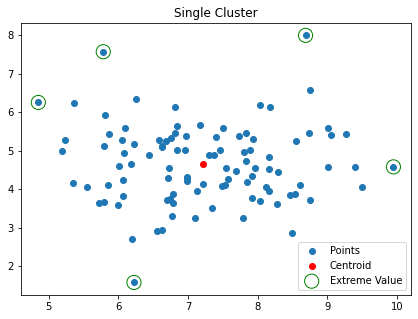

In [4]:
distances = kmeans.transform(X)
#argsort returns an array of indexes which will sort the array in ascending order 
#so we reverse it via [::-1] and take the top five with [:5]

sorted_idx = np.argsort(distances.ravel())[::-1][:5]

fig, ax = plt.subplots(figsize=(7,5))
ax.set_title("Single Cluster")
ax.scatter(X[:,0],X[:,1],label="Points")
ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],label='Centroid',color='r')
ax.scatter(X[sorted_idx][:,0],X[sorted_idx][:,1], label='Extreme Value', edgecolors='g',facecolors='none',s=200)
ax.legend()

###### Next, we can remove these extreme points if we like 

In [5]:
new_X = np.delete(X, sorted_idx, axis=0)

#after that, centroid will change, therefore calculating new kmeans 
new_kmeans = KMeans(n_clusters=1)
new_kmeans.fit(new_X)

KMeans(n_clusters=1)

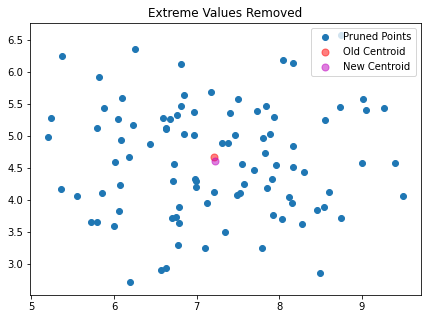

In [7]:
#Visualizing the difference between the OLD and NEW centroids 

fig, ax = plt.subplots(figsize=(7,5))
ax.set_title("Extreme Values Removed")
ax.scatter(new_X[:,0],new_X[:,1], label='Pruned Points')
ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], label = 'Old Centroid', color='r', s= 50, alpha=.5)
ax.scatter(new_kmeans.cluster_centers_[:,0], new_kmeans.cluster_centers_[:,1],label='New Centroid', color='m', s = 50, alpha=.5)
ax.legend()

###### There's a fundamental connection between `Gaussian Distribution` and the `K-Means` clustering. If we create an empirical Gaussian based on centroid, and sample covariance matrix and look at the probability of each point - the points we removed are actually those with least likelihood

In [8]:
from scipy import stats 
emp_dist = stats.multivariate_normal(kmeans.cluster_centers_.ravel())
lowest_prob_idx = np.argsort(emp_dist.pdf(X))[:5]
np.all(X[sorted_idx] == X[lowest_prob_idx])

True

#### Using KNN for regression

##### Regression is certainly a supervised technique, however, with `K-NN` clustering, using K closes points in the feature space, regression model can be built
###### `KNN Regression` is very simple. It caculate the average of $K$ closest points to the points being tested

In [1]:
import numpy as np 
from sklearn import datasets 
iris = datasets.load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

###### Using `LinearRegression`

In [5]:
#try to predict the petal length based on sepal length and width. 

X = iris.data[:,:2] 
y = iris.data[:,2]

from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
lr.fit(X,y)
print("The MSE is {:.2}".format(np.power(y-lr.predict(X),2).mean()))

The MSE is 0.41


###### Using `KNN Regression`

In [7]:
from sklearn.neighbors import KNeighborsRegressor 
knnr = KNeighborsRegressor(n_neighbors=10)
knnr.fit(X,y) 
print("The MSE is {:.2}".format(np.power(y-knnr.predict(X),2).mean()))

The MSE is 0.17


###### What `KNN Regressor` does well through visualization

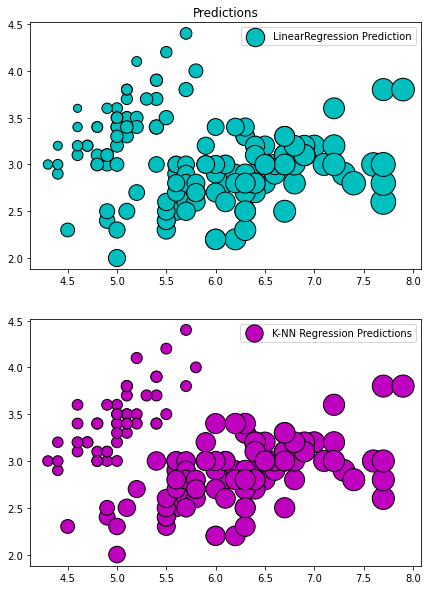

In [9]:
import matplotlib.pyplot as plt 
%matplotlib inline

fig, ax = plt.subplots(nrows=2, figsize=(7,10))
ax[0].set_title("Predictions")
ax[0].scatter(X[:,0],X[:,1],s = lr.predict(X)*80, label="LinearRegression Prediction", color='c',edgecolors='black')
ax[1].scatter(X[:,0],X[:,1],s=knnr.predict(X)*80, label='K-NN Regression Predictions',color='m',edgecolors='black')
ax[0].legend()
ax[1].legend()

##### Predictions seems relatively close for the most part, lets look at the predictions for the Setosa species as compared to the actual

In [11]:
setosa_idx = np.where(iris.target_names=='setosa')
setosa_mask = iris.target == setosa_idx[0]
y[setosa_mask][:5]

array([1.4, 1.4, 1.3, 1.5, 1.4])

In [12]:
knnr.predict(X)[setosa_mask][:5]

array([1.46, 1.45, 1.51, 1.42, 1.46])

In [13]:
lr.predict(X)[setosa_mask][:5]

array([1.84557896, 2.1597721 , 1.53692893, 1.49323201, 1.53415738])

In [14]:
### KNN_Regression manually 

from sklearn.metrics import pairwise 
distances_to_example = pairwise.pairwise_distances(X)[0]
ten_closest_points = X[np.argsort(distances_to_example)][:10]
ten_closest_y = y[np.argsort(distances_to_example)][:10]
ten_closest_y.mean()

1.46